In [1]:
# %pip install dhi-dsmatch[training]==1.1.22

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from tqdm.auto import tqdm
from pyathena import connect
from pyathena.pandas.cursor import PandasCursor
cursor = connect(s3_staging_dir='s3://aws-athena-query-results-229357985605-us-east-1/',
                 region_name='us-east-1',
                 cursor_class=PandasCursor).cursor()


from dhi.dsmatch import local_bucket
from dhi.dsmatch.sklearnmodeling.models.applytransformer import ApplyTransformer
from dhi.dsmatch.sklearnmodeling.functiontransformermapper import applymap

In [3]:
# data = pd.read_csv (os.path.join(local_bucket,'data','dice','new-bg-parsing-2022','parsed-data-10000-rec.csv'))


In [4]:

# new_df = []
# for (y, m), g in tqdm(data.groupby(['year', 'month'])):
#     snapshot_ids = g.snapshot_id.unique()
#     sql=f"""SELECT  year, month, day, snapshot_id, profile_id, array_join(array_agg(skill_name), ':: ') as profile_skill_data_pond
#                 , array_join(array_agg(skill_years_of_experience), ', ') as profile_skills_exp
#         FROM prod_matchology_annotations.profile_skills 
#         WHERE snapshot_id in {tuple(snapshot_ids)}
#         AND year='{y}'
#         AND month='{m:02d}'
#         GROUP BY snapshot_id, profile_id, year, month, day
#         """
#     d1 = cursor.execute(sql).as_pandas()
#     new_df.append(d1)
# df = pd.concat(new_df, ignore_index = True)



# converting str into int for years, month and days

In [5]:
# def max_val(x):
#     try:
#         return max(map(int,x.split(',')))
#     except:
#         pass
#     return np.nan
# df['overall_exp_profile'] = df['profile_skills_exp'].apply(max_val)
# df['overall_exp_profile'] [:2]

In [6]:
# data = pd.merge(data,df , how='left')
# data = data.rename(columns={'overall_experience_resume':'overall_exp_bg' })
# data.to_csv(os.path.join(local_bucket,'data','dice','new-bg-parsing-2022','parsed-data-10000-rec-with-profile-exp.csv'),index=False)


Parsing resume overall experience

In [7]:
# from dhi.dsmatch.preprocess.bgprocessing import datetime_to_julian
# from jsonpath_ng import parse
# def match_with_present(x,present):

#     try:
#         return int(x)
#     except ValueError:
#         pass
#     return present

# def extract_resume_overall_experience(d: dict) -> int:
#     """
#     """
#     try:
#         explist = d['responseData']['ResDoc']['resume']['experience']
#         if not isinstance(explist, list):
#             explist = [explist]

#         try:
#             present = int(d['responseData']['ResDoc']['resume']['@present'])
#         except KeyError:
#             present = datetime_to_julian(datetime.today())
#         min_start = present
#         max_end = present
        
        
        
#         try:
#             jsonpath_expr = parse(f'$..@end')
#             ends = list(map(int, [match.value for match in jsonpath_expr.find(d)]))
#             jsonpath_expr = parse(f'$..daterange.end.@days')
#             ends2 = list(map(int, [match.value for match in jsonpath_expr.find(d)]))
#             ends.extend(ends2)
#             max_end = np.max(ends)
#         except ValueError:
#             pass
        
        
#         try:
#             jsonpath_expr = parse(f'$..@start')
            
#             starts = list(map(int, [match.value for match in jsonpath_expr.find(d)]))
#             jsonpath_expr = parse(f'$..daterange.start.@days')
#             matches = [match.value for match in jsonpath_expr.find(d)]
            
#             starts2 = list(map(lambda x: match_with_present(x,present), matches))
#             starts.extend(starts2)
            
#             min_start = np.min(starts)
            
#         except ValueError:
#             pass
        
#         diff = max_end - min_start  # In days
#         if diff> 0 :
#             return diff
        
         
    
#     except KeyError:
#         pass
#     return -1

In [8]:
# data['resume_new_bg_parse']= data['resume_new_bg_parse'].apply(eval)

In [9]:

# tx = ApplyTransformer(applymap, extract_resume_overall_experience)
# data['overall_experience_bg'] = tx.transform(data['resume_new_bg_parse'])
# idxs = data[data['overall_experience_bg'] > -1].index
# data.loc[idxs, 'overall_experience_bg'] /= 365
# data['overall_experience_bg'].value_counts(normalize=True)

In [10]:
# data.to_csv(os.path.join(local_bucket,'data','dice','new-bg-parsing-2022','parsed-data-10000-rec-with-profile-exp.csv'),index=False)


The above cell takes more than 30 min to run, so we have saved the data. It is advisable to run all the cell below.

In [11]:
data = pd.read_csv(os.path.join(local_bucket,'data','dice','new-bg-parsing-2022','parsed-data-10000-rec-with-profile-exp.csv'))


In [12]:
data.head()

,snapshot_id,profile_id,year,month,day,previous_title,current_title,profile_skills,job_skills,desired_title,...,resume_skill_experience,resume_new_bg_skills,resume_new_len_skills,resume_new_len_experience_skills,resume_frac_skills_with_experience,resume_job_experience,profile_skill_data_pond,profile_skills_exp,overall_exp_profile,overall_experience_bg
0,4350cf17-f757-5c8a-b2e4-97a772b758a8,9e3468c4014bac5737dd0864543ab978,2021,2,24,Network Engineer I:: Technical Solutions Analyst,Network Engineer,NaN,yaml:: amazon web services:: devops:: python::...,Network Engineer,...,"{'Ansible': {'duration': 3.750684931506849, 'l...","['Ansible', 'Business-to-Business', 'Cisco', '...",26,19,0.730769,"[{'bgtocc': '15-1199.02', 'duration': 3.750684...",Network engineering:: VPN:: Network:: Tier 3::...,"2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...",5.0,5.830137
1,1b18511f-3339-44c4-92b4-8ac7418aa227,7c486ad56923319f8369f3cabf9778aa,2021,11,19,NaN,Android Developer,Software:: Android:: JSON:: RESTful:: Web serv...,cocoa:: xcode 10.x:: ios sdk:: swift,Android Developer,...,{'Android Software Development Kit (SDK)': {'d...,"['Android Software Development Kit (SDK)', 'An...",68,44,0.647059,"[{'bgtocc': '15-1131.92', 'duration': 6.172602...",Software:: Android:: JSON:: RESTful:: Web serv...,"8, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 4, 4, 4, 4, 4...",8.0,11.249315
2,421a2d27-06d8-5e86-8045-75df5bd32c41,9f8a9cbbfd69c11429f0576f77710129,2021,4,20,NaN,NaN,NaN,NaN,Sr. Project Manager,...,{'Account Adjustment': {'duration': 21.2547945...,"['Account Adjustment', 'Agile Project Manageme...",65,43,0.661538,"[{'bgtocc': '15-1199.09', 'duration': 21.25479...",Microsoft Windows:: Agile/Scrum:: Active liste...,"10, 7, 15, 15, 10, 9, 15, 14, 14, 7, 15, 10, 7...",37.0,21.254795
3,68436bfa-c2c4-5849-b5e5-3252b97ae6af,744187a046aa197acad39dd325b43a07,2021,8,31,Field Service Technician:: Integration Special...,NaN,Repair:: Network:: Technician:: Field service:...,it support:: desktop,Field Service Technician,...,"{'Cabling': {'duration': 9.246575342465754, 'l...","['Articulate', 'Building Effective Relationshi...",45,15,0.333333,"[{'bgtocc': '15-1142.00', 'duration': 9.246575...",Repair:: Network:: Technician:: Field service:...,"6, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2...",6.0,15.252055
4,22e4dfce-db6c-5a98-bb2f-87ad33ac40d0,b32f76fef50fc6d9fa874ef2c35fb47e,2020,12,28,NaN,NaN,NaN,.net core reactjs developer,Stack Developer,...,"{'.NET': {'duration': 12.087671232876712, 'las...","['.NET', '.NET Core', 'AJAX', 'API Management'...",186,185,0.994624,"[{'bgtocc': '15-1131.00', 'duration': 3.578082...",Web applications:: Web services:: C#:: ASP.NET...,"10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 8...",10.0,12.087671


preprocessing before analysis

In [13]:
data['year'] = data['year'].astype(int)# converting into int
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['job_minyrsexp'] = data['job_minyrsexp'].str.replace('NOT FOUND','-1')
data['job_minyrsexp'] = data['job_minyrsexp'].astype(float)


data['description_experience_min'] = data['description_experience_min'].str.replace('NOT FOUND','-12')
data['description_experience_min'] = data['description_experience_min'].astype(float)
data['description_experience_min'] = data['description_experience_min']/12



In [14]:
cols = ['job_description','overall_experience_bg','overall_exp_profile','job_minyrsexp','description_experience_min']
data = data[['job_description','overall_experience_bg','overall_exp_profile','job_minyrsexp','description_experience_min']]
data.head(2)

,job_description,overall_experience_bg,overall_exp_profile,job_minyrsexp,description_experience_min
0,<!DOCTYPE html><html><head></head><body><p><st...,5.830137,5.0,2.0,5.0
1,<!DOCTYPE html><html><head></head><body><p><sp...,11.249315,8.0,-1.0,6.0


Data which is zero or less than zero.There are 42% of the 10000 records in job_minyrsexp are empty. If we consider to filling the gap of job_minyrsexp experience with description_experience_min. We can leverage the empty or zero records of job_minyrsexp by filling the gaps with description_experience_min to consider it as overall experience for job descrition.


In [15]:
display(HTML(f'<font color=blue>Records present</font>'))
for c in cols[1:]:
    print(f'{c}:', f'{((data[data[c]>0].shape[0]/data.shape[0])*100)}%')

overall_experience_bg: 92.72%
overall_exp_profile: 98.72999999999999%
job_minyrsexp: 57.50999999999999%
description_experience_min: 55.63%


# Job

To check the relaibility of some of records we visulaize on box plot. By looking the below graph `job_minyrsexp` have way more outliers than `description_experience_min`. 

Text(0.5, 0, 'years of expe}rience in job description(job_minyrsexp)')

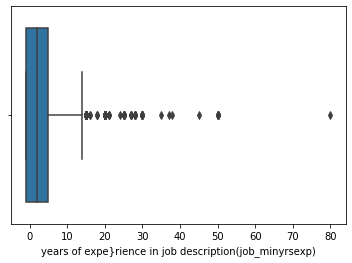

In [16]:
import seaborn as sns
g = sns.boxplot(x=data['job_minyrsexp'])
g.set_xlabel('years of expe}rience in job description(job_minyrsexp)') 


Text(0.5, 0, 'years of experience in job description(description_experience_min)')

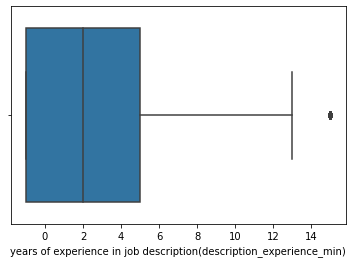

In [17]:
g = sns.boxplot(x=data['description_experience_min'])
g.set_xlabel('years of experience in job description(description_experience_min)') 

The above graph of job_minyrsexp says there are some JDs asking forom 50-80 years of expereince. By check few example over 30 years we have found that it is picking the values of companies age (number of years in the business) as a years of experience. These records are risky to use it, instead we should not use it at all. Below are some of the example where it is picking company's age.


In [18]:
#35 none pickeup any correct records
#50 description_experience_min is accurate
# 12 index[2], job_minyrsexp is more accurate for our model
#21 index[0] a good example , and index[1] is picking company's experience
n  = data[data['job_minyrsexp']>15].reset_index()
n = n['index'][7]
for c in ['job_minyrsexp','description_experience_min']:
    print(c,":",data[c][n])
HTML(data.job_description[n])

job_minyrsexp : 20.0
description_experience_min : -1.0


Taking a sampl of 100 revods to visulize them

In [19]:
df_2 = data.sample( n=100)


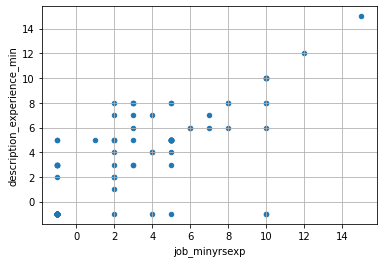

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_2.plot.scatter('job_minyrsexp','description_experience_min', ax=ax);
# ax.plot([0, 35], [0, 35], color='black', lw=.7)
ax.grid()

99 percentile:  12.0
Max value:  15.0
Min value:  -1.0


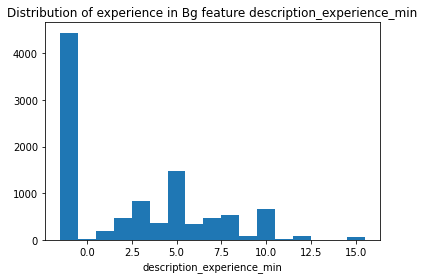

In [21]:
val  = data['description_experience_min']
print("99 percentile: ",val.quantile(.994))
print("Max value: ",val.max())
print("Min value: ",val.min())
bins = np.arange(-1.5,data['description_experience_min'].max()+1)
fig, ax=plt.subplots()
ax.hist(data['description_experience_min'].apply(round), bins)
ax.set_xlabel('description_experience_min')
ax.title.set_text('Distribution of experience in Bg feature description_experience_min');


Cliping the description_experience_min values uptill 15 years and converting all -1 into NaNs

In [22]:
data['description_experience_min']  = data['description_experience_min'].clip(lower=-1, upper=15)
data['description_experience_min'] = data['description_experience_min'].replace(-1,np.nan)
data = data.rename(columns={'description_experience_min':'job_overall_exp'})

We have made a decision on using description_experience_min as overall years of experience in job.

# Resume
As per the previous analysis we have decided to combine the BG and profile expereince and take a mean of those.

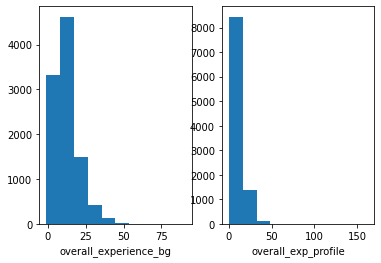

In [23]:
fig, (ax0, ax1) = plt.subplots(1,2)
ax0.hist(data['overall_experience_bg'])
ax0.set_xlabel('overall_experience_bg');

ax1.hist(data['overall_exp_profile'])
ax1.set_xlabel('overall_exp_profile');

In [24]:
res = (data[(data['overall_experience_bg'].notnull())& data['overall_exp_profile'].notnull()].shape[0]/data.shape[0])*100
display(HTML(f'Total records when data are present in both columns: {res}%'))

Distribution of both the features BG and profile experience

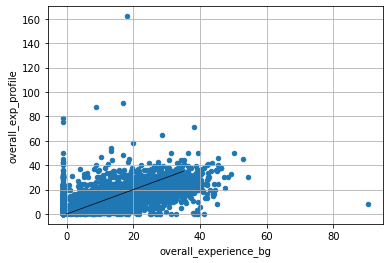

In [25]:

fig, ax = plt.subplots()
data.plot.scatter('overall_experience_bg', 'overall_exp_profile', ax=ax);
ax.plot([0, 35], [0, 35], color='black', lw=.7)
ax.grid()

Checking the outliers

Text(0.5, 0, 'years of experience in resume (overall_exp_profile)')

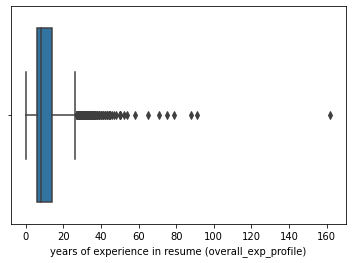

In [26]:

g = sns.boxplot(x=data['overall_exp_profile'])
g.set_xlabel('years of experience in resume (overall_exp_profile)') 

Text(0.5, 0, 'years of experience in resume(overall_experience_bg)')

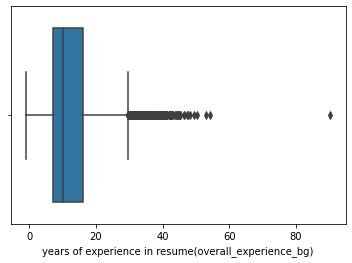

In [27]:

g = sns.boxplot(x=data['overall_experience_bg'])
g.set_xlabel('years of experience in resume(overall_experience_bg)') 

In [28]:
data['overall_exp_profile'] = data['overall_exp_profile'].clip(lower=-1, upper=25)
data['overall_exp_profile'] = data['overall_exp_profile'].replace(-1,np.nan)

The overall_exp_profile has way many outliers. the 96 percentile is 25 or less years of experience. We are making a decision on converting values greater than 25 into 25 and anything less than 0 will be a NaN. The below distribution after removing outliers.

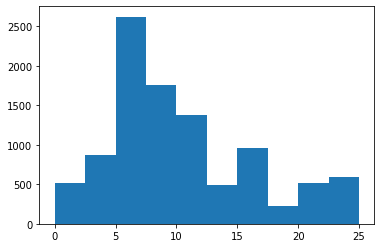

In [29]:
bins = np.arange(-1.5,data['overall_exp_profile'].max()+1)

plt.hist(data['overall_exp_profile']);


As decided before we are going to add BG and profile experience and use the mean score as 

In [30]:
data['overall_experience_bg'] = data['overall_experience_bg'].clip(lower=-1, upper=25)#cliping value between -1 and 25
data['overall_experience_bg'] = data['overall_experience_bg'].replace(-1,np.nan)# converting -1 as NaNs.
data['overall_experience_bg'] = data['overall_experience_bg'].fillna(data['overall_exp_profile'])#filling NaNs with profile data
data['overall_exp_profile']   = data['overall_exp_profile'].fillna(data['overall_experience_bg'])#filling NaNs with BG data

# Final calculation of Overall experience for resume

In [31]:

data['resume_overall_exp'] =  (data['overall_exp_profile']+data['overall_experience_bg'])/2

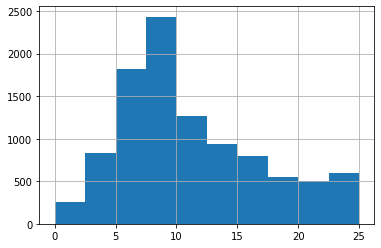

In [32]:
data['resume_overall_exp'].hist();

Now we have data which we can use in the model, we are going to check the availability of the data.


In [33]:
res = (data['resume_overall_exp'][data['resume_overall_exp']>0].shape[0]/data.shape[0])*100
display(HTML(f'Total non zero resume records: {round(res,2)}%'))

res = (data['job_overall_exp'][data['job_overall_exp']>0].shape[0]/data.shape[0])*100
display(HTML(f'Total non zero job records: {round(res,2)}%'))

# Availibility

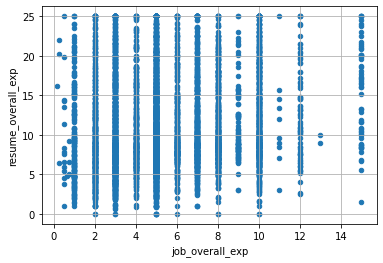

In [34]:
fig, ax = plt.subplots()
data.plot.scatter('job_overall_exp','resume_overall_exp', ax=ax);
# ax.plot([0, 35], [0, 35], color='black', lw=.7)
ax.grid()

In [35]:
# Meets overall experience 

In [36]:
display(HTML(f'<font color=blue>Data where resume experience is equal and more than jobs</font>'))
data['meets_experience'] = (data['resume_overall_exp']>=data['job_overall_exp']) 
data['meets_experience'].value_counts()

False    5337
True     4663
Name: meets_experience, dtype: int64

In [37]:
display(HTML(f'<font color=blue>Data which is not null and where resume experience is equal and more than jobs</font>'))
data['meets_experience'][(data['job_overall_exp'].notnull())&(data['resume_overall_exp'].notnull())].value_counts()

True     4663
False     899
Name: meets_experience, dtype: int64

In [38]:
res = (data[(data['job_overall_exp'].notnull())&(data['resume_overall_exp'].notnull())].shape[0]/data.shape[0])*100
display(HTML(f'<font color=blue>Data present in both side:</font> {round(res,2)}%'))

Looking thise 899 records where resume is less than job experiences

In [39]:
df_ = data[(data['job_overall_exp'].notnull())&(data['resume_overall_exp'].notnull())]
n = df_[df_['meets_experience']==False].reset_index()
n = n['index'][1]
for c in ['job_overall_exp','resume_overall_exp','meets_experience']:
    print(c, df_[c][n])
HTML(df_['job_description'][n])

job_overall_exp 10.0
resume_overall_exp 9.92054794520548
meets_experience False


Distribution of differnce of resume and job experience value, 50 percent of the resume have 5 or more years of than aksed in job.

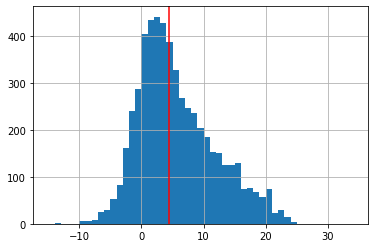

In [44]:
dd = data[(data['job_overall_exp'].notnull())&(data['resume_overall_exp'].notnull())]

dd['dist'] = dd['resume_overall_exp']-dd['job_overall_exp']

fig, ax=plt.subplots()
dd['dist'].hist(bins = np.arange(-15,35))

ax.axvline(dd['dist'].quantile(.5),color='red');

Distribution of 899 records where candidate experierce is less than asked in the job, 50% of the resume are 2 or less yaers of experience to qualify for a match. This is somthing we need to make a decision, on consedering ot as a match or not.

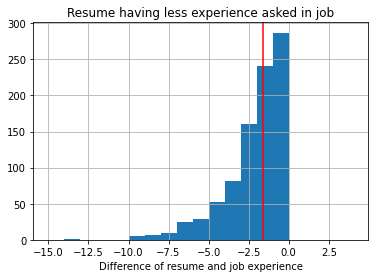

In [43]:
fig, ax=plt.subplots()
d_ = df_[df_['meets_experience']==False]
d_['dist'].hist(bins = np.arange(-15,5))
d_['dist'].quantile(.5)
ax.axvline(d_['dist'].quantile(.5),color='red')
ax.set_xlabel('Difference of resume and job experience')
ax.title.set_text('Resume having less experience asked in job');

In [49]:
# lab_df = pd.read_csv(os.path.join(local_bucket, 'data','dice','v2','dice_labeled_20220307_experience_consensus_sandbox.csv'))

**Results**
- We have non-zero 99%  resume records and 55% job records.
- 55% of records have non-zero experience on both sides (resume and job).
- 46% of resumes have above experience than the asking experience in the job.

**Conclusion:**
We will use the mean of combined scores of BG parsing and maximum skills experience present in the profile as resume overall experience if present on both sides else either one is present. For job we are using @experience-min as job overall experience.  We have checked the quality of the data and made it ready for use. 


**Next Steps**
- Decision on an applied resume that is 1 or 2 away from the match.
- Make a binary classifier that can fit into the composite model.
- Exploring other gradients on the distribution of the difference between resumes and job experience.
- Getting training data ready with new BG parsings and profile data extraction from profile experience and Train and exploring labeled data set signals.